In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
## Leitura dos Dados

In [2]:
# Leitura do dataset de bens dos candidatos

df_bens = pd.read_csv('data/cleaned/bens_candidatos_brasil.csv', sep=';', encoding='utf-8')
df_bens.head()

,SG_UF,SQ_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,VR_BEM_CANDIDATO
0,TO,270001697127,11,APARTAMENTO,23000.0
1,TO,270001697127,11,APARTAMENTO,905270.0
2,TO,270001697127,21,"VEICULO AUTOMOTOR TERRESTRE: CAMINHAO, AUTOMOV...",15000.0
3,TO,270001697127,21,"VEICULO AUTOMOTOR TERRESTRE: CAMINHAO, AUTOMOV...",35800.0
4,TO,270001697127,21,"VEICULO AUTOMOTOR TERRESTRE: CAMINHAO, AUTOMOV...",78000.0


In [3]:
# Leitura do dataset de despesas dos candidatos

df_despesas = pd.read_csv('data/cleaned/despesas_candidatos_brasil.csv', sep=';', encoding='utf-8')
df_despesas.head()

,ST_TURNO,SG_UF,SQ_CANDIDATO,CD_ORIGEM_DESPESA,DS_ORIGEM_DESPESA,DS_DESPESA,VR_DESPESA_CONTRATADA
0,1,AC,10001623440,20800000,ATIVIDADES DE MILITANCIA E MOBILIZACAO DE RUA,PANFLETAGEM BANDEIRACO ATUACAO EM COMITE,1200.0
1,1,AC,10001601556,20800000,ATIVIDADES DE MILITANCIA E MOBILIZACAO DE RUA,ATIV PANFLET.BANDEIRACO.ATUA COMITE,1200.0
2,1,AC,10001623440,20800000,ATIVIDADES DE MILITANCIA E MOBILIZACAO DE RUA,ATIV PANFLET.BANDEIRACO.ATUA COMITE - 16 DIAS ...,500.0
3,1,AC,10001623440,20800000,ATIVIDADES DE MILITANCIA E MOBILIZACAO DE RUA,PANFLETAGEM BANDEIRACO ATUACAO EM COMITE,1200.0
4,1,AC,10001623440,20800000,ATIVIDADES DE MILITANCIA E MOBILIZACAO DE RUA,PANFLETAGEM BANDEIRACO ATUACAO EM COMITE,1000.0


In [4]:
# Leitura do dataset de receitas dos candidatos

df_votacao = pd.read_csv('data/cleaned/votacao_nominal_brasil.csv', sep=';', encoding='utf-8')
df_votacao.head()

,NR_TURNO,SG_UF,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,SG_PARTIDO,NM_PARTIDO,QT_VOTOS_NOMINAIS,QT_VOTOS_NOMINAIS_VALIDOS,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO
0,1,CE,3,GOVERNADOR,60001608845,WAGNER SOUSA GOMES,UNIAO,UNIAO BRASIL,5468,5468,4,NAO ELEITO
1,1,CE,3,GOVERNADOR,60001608845,WAGNER SOUSA GOMES,UNIAO,UNIAO BRASIL,6727,6727,4,NAO ELEITO
2,1,CE,3,GOVERNADOR,60001608845,WAGNER SOUSA GOMES,UNIAO,UNIAO BRASIL,2106,2106,4,NAO ELEITO
3,1,CE,3,GOVERNADOR,60001608845,WAGNER SOUSA GOMES,UNIAO,UNIAO BRASIL,16865,16865,4,NAO ELEITO
4,1,CE,3,GOVERNADOR,60001608845,WAGNER SOUSA GOMES,UNIAO,UNIAO BRASIL,3475,3475,4,NAO ELEITO


---
## Estatísticas Básicas - Bens dos Candidatos

In [5]:
# Calculando as médias de bens declarados

mean_asset_value  = df_bens['VR_BEM_CANDIDATO'].mean()
mean_by_state     = df_bens.groupby('SG_UF')['VR_BEM_CANDIDATO'].mean()
mean_by_candidate = df_bens.groupby('SQ_CANDIDATO')['VR_BEM_CANDIDATO'].mean()
print(f"Média de bens declarados: R$ {mean_asset_value:.2f}")

Média de bens declarados: R$ 1049487.05


In [6]:
# Calculando a mediana de bens declarados

median_asset_value = df_bens['VR_BEM_CANDIDATO'].median()
print(f"Mediana de bens declarados: R$ {median_asset_value:.2f}")

Mediana de bens declarados: R$ 62271.99


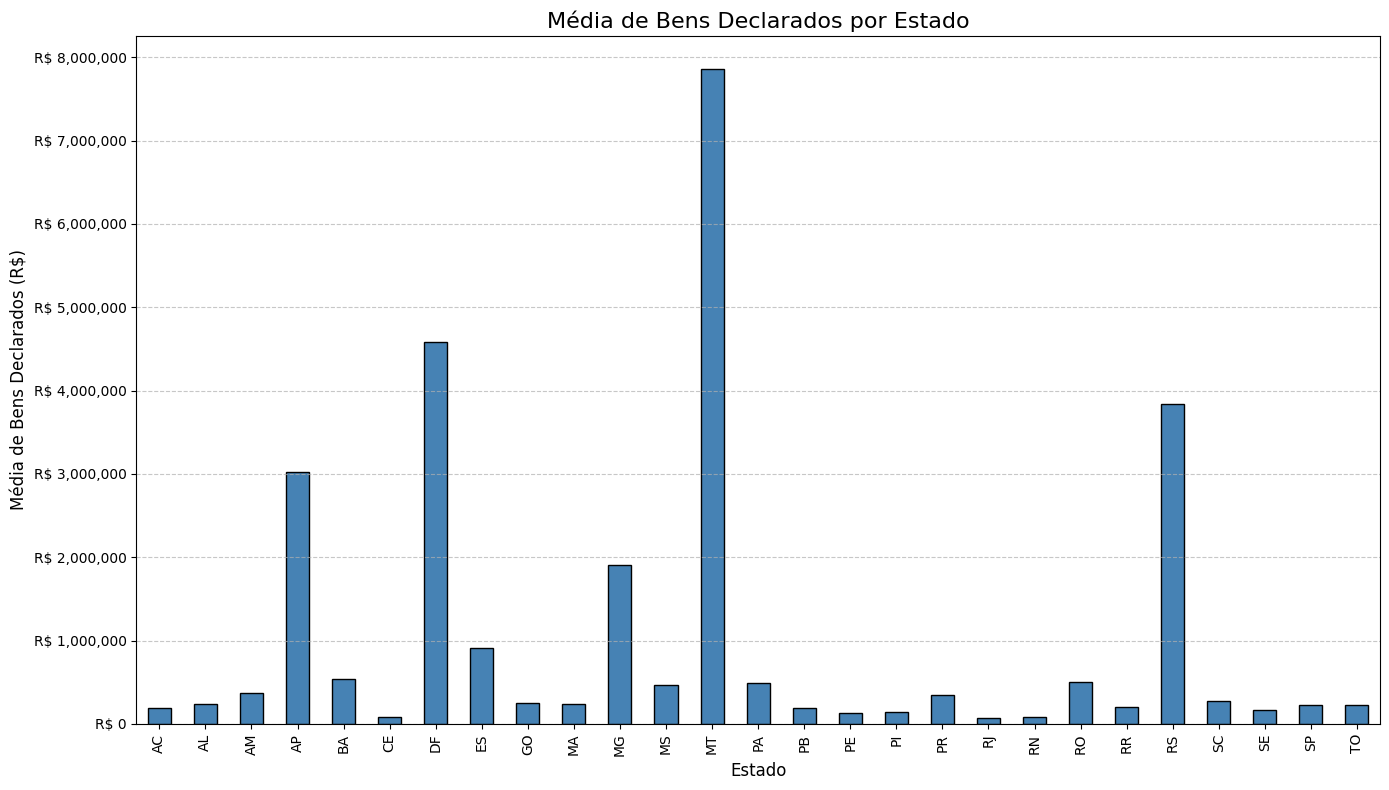

In [7]:
# Plotando a média de bens declarados por estado

plt.figure(figsize=(14, 8))
mean_by_state.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Média de Bens Declarados por Estado', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Média de Bens Declarados (R$)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().get_yaxis().set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, _: f'R$ {x:,.0f}'))

plt.tight_layout()
plt.show()

In [8]:
# Calculando total de instâncias, total de bens declarados e total de candidatos

sum_asset_value     = df_bens['VR_BEM_CANDIDATO'].sum()
count_assets        = df_bens['VR_BEM_CANDIDATO'].count()
total_candidates    = df_bens['SQ_CANDIDATO'].nunique()
candidates_by_state = df_bens.groupby('SG_UF')['SQ_CANDIDATO'].nunique()

print(f"\nTotal de bens declarados: R$ {sum_asset_value:.2f}")
print(f"Quantidade de bens declarados: {count_assets}")
print(f"Quantidade de candidatos: {total_candidates}")


Total de bens declarados: R$ 1792523875.72
Quantidade de bens declarados: 1708
Quantidade de candidatos: 185


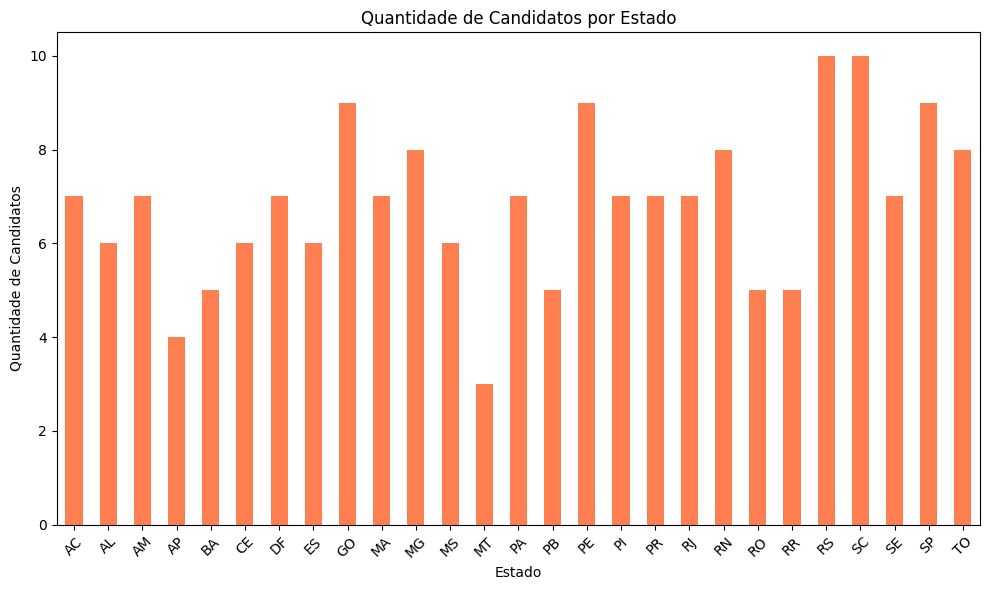

In [9]:
# Plotando a quantidade de candidatos por estado

plt.figure(figsize=(10, 6))
candidates_by_state.plot(kind='bar', color='coral')
plt.title('Quantidade de Candidatos por Estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Candidatos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Calculando as variações de bens declarados

std_asset_value  = df_bens['VR_BEM_CANDIDATO'].std()
std_by_state     = df_bens.groupby('SG_UF')['VR_BEM_CANDIDATO'].std()
std_by_candidate = df_bens.groupby('SQ_CANDIDATO')['VR_BEM_CANDIDATO'].std()

print(f"Variação de bens declarados: R$ {std_asset_value:.2f}")

print("\nVariação de bens declarados por estado:")
for position, value in mean_by_state.items():
    print(f"{position}: R$ {value:.2f}")

print("\nVarição de bens declarados por candidato:")
for candidate, value in mean_by_candidate.items():
    print(f"Candidato {candidate}: R$ {value:.2f}")

Variação de bens declarados: R$ 14152398.02

Variação de bens declarados por estado:
AC: R$ 188670.13
AL: R$ 242592.94
AM: R$ 366026.75
AP: R$ 3023984.60
BA: R$ 541336.76
CE: R$ 78114.12
DF: R$ 4578035.00
ES: R$ 908112.71
GO: R$ 245910.12
MA: R$ 241866.41
MG: R$ 1905135.26
MS: R$ 462637.19
MT: R$ 7864590.80
PA: R$ 487450.73
PB: R$ 192697.32
PE: R$ 131296.72
PI: R$ 149388.74
PR: R$ 343014.99
RJ: R$ 71840.48
RN: R$ 87669.42
RO: R$ 501673.83
RR: R$ 198099.16
RS: R$ 3845379.28
SC: R$ 279035.68
SE: R$ 162840.16
SP: R$ 223579.64
TO: R$ 224974.63

Varição de bens declarados por candidato:
Candidato 10001595336: R$ 171300.00
Candidato 10001601556: R$ 170182.94
Candidato 10001606307: R$ 6250.00
Candidato 10001612476: R$ 177978.74
Candidato 10001616169: R$ 192836.67
Candidato 10001623440: R$ 474819.89
Candidato 10001639519: R$ 30587.92
Candidato 20001610327: R$ 139372.50
Candidato 20001651898: R$ 91514.17
Candidato 20001695808: R$ 171759.48
Candidato 20001697076: R$ 248352.68
Candidato 200016979

In [11]:
# Calculando a moda dos tipos de bens declarados

mode_asset_type = df_bens['DS_TIPO_BEM_CANDIDATO'].mode()[0]
print(f"Moda dos tipos de bens declarados: {mode_asset_type}")

Moda dos tipos de bens declarados: QUOTAS OU QUINHOES DE CAPITAL


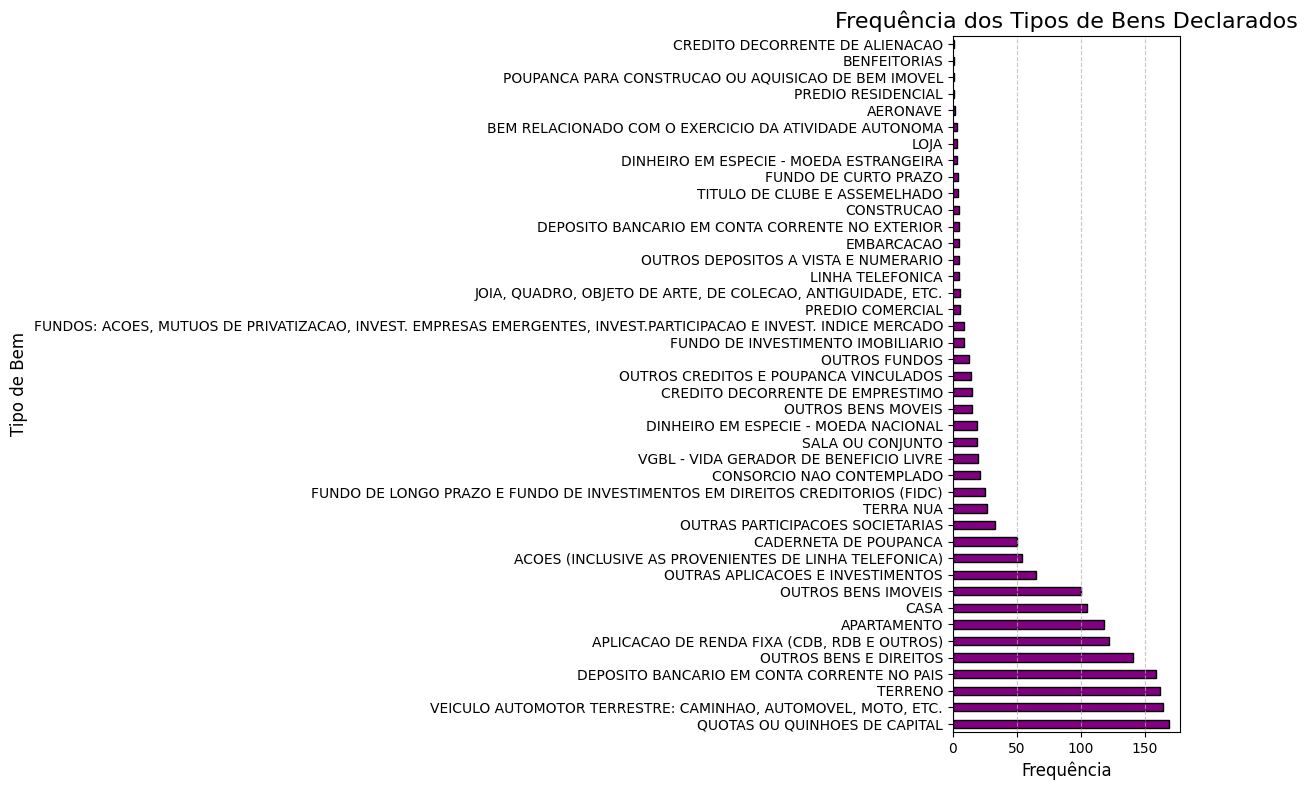

In [12]:
# Calculando a frequência dos tipos de bens declarados

asset_type_counts = df_bens['DS_TIPO_BEM_CANDIDATO'].value_counts()

plt.figure(figsize=(12, 8))
asset_type_counts.plot(kind='barh', color='purple', edgecolor='black')
plt.title('Frequência dos Tipos de Bens Declarados', fontsize=16)
plt.xlabel('Frequência', fontsize=12)
plt.ylabel('Tipo de Bem', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

---
## Estatísticas Básicas - Despesas dos Candidatos

In [13]:
mean_despesas = df_despesas['VR_DESPESA_CONTRATADA'].mean()
print(f"Média das despesas: R${mean_despesas:.2f}")

median_despesas = df_despesas['VR_DESPESA_CONTRATADA'].median()
print(f"Mediana das despesas: R${median_despesas:.2f}")

std_despesas = df_despesas['VR_DESPESA_CONTRATADA'].std()
print(f"Desvio padrão das despesas: {std_despesas:.2f}")

sum_despesas = df_despesas['VR_DESPESA_CONTRATADA'].sum()
print(f"Montante geral das despesas: R${sum_despesas:.2f}")

mean_despesas_estado = df_despesas.groupby('SG_UF')['VR_DESPESA_CONTRATADA'].sum()

Média das despesas: R$7233.69
Mediana das despesas: R$700.00
Desvio padrão das despesas: 60319.51
Montante geral das despesas: R$525694174.49


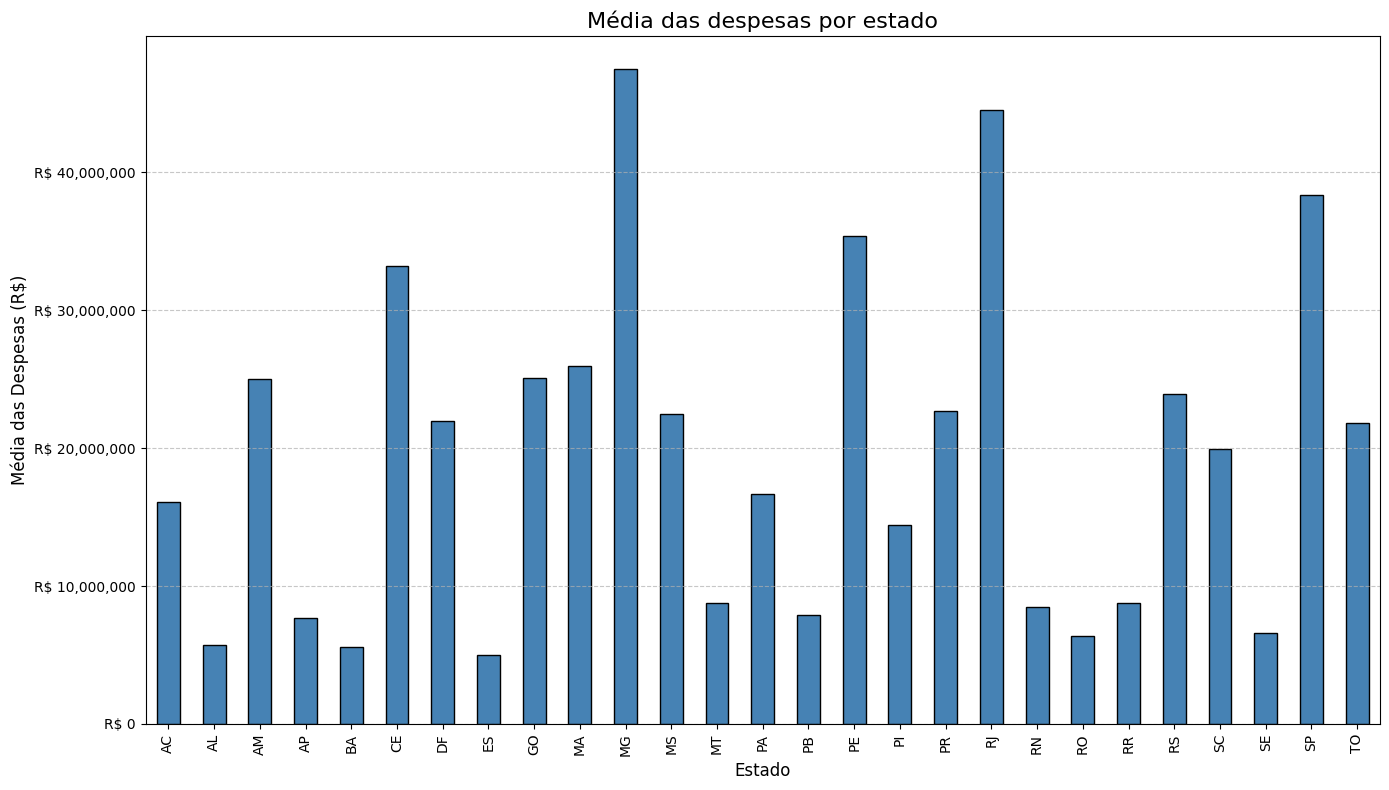

In [14]:
# Plotando a média de despesas por estado

plt.figure(figsize=(14, 8))
mean_despesas_estado.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Média das despesas por estado', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Média das Despesas (R$)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().get_yaxis().set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, _: f'R$ {x:,.0f}'))

plt.tight_layout()
plt.show()

---
## Estatísticas Básicas - Votação Nominal

In [15]:
sum_votos_total = df_votacao['QT_VOTOS_NOMINAIS_VALIDOS'].sum()
print(f"Soma total de votos válidos: {sum_votos_total}")

mean_votos_candidatos = df_votacao.groupby('NM_CANDIDATO')['QT_VOTOS_NOMINAIS_VALIDOS'].sum().mean()
print(f"Média de votos por candidato: {mean_votos_candidatos:.2f}")

median_votos_candidatos = df_votacao.groupby('NM_CANDIDATO')['QT_VOTOS_NOMINAIS_VALIDOS'].sum().median()
print(f"Mediana de votos por candidato: {median_votos_candidatos:.2f}")

std_votos_candidatos = df_votacao.groupby('NM_CANDIDATO')['QT_VOTOS_NOMINAIS_VALIDOS'].sum().std()
print(f"Desvio padrão: {std_votos_candidatos:.2f}")

Soma total de votos válidos: 108448349
Média de votos por candidato: 516420.71
Mediana de votos por candidato: 53779.50
Desvio padrão: 1244308.40


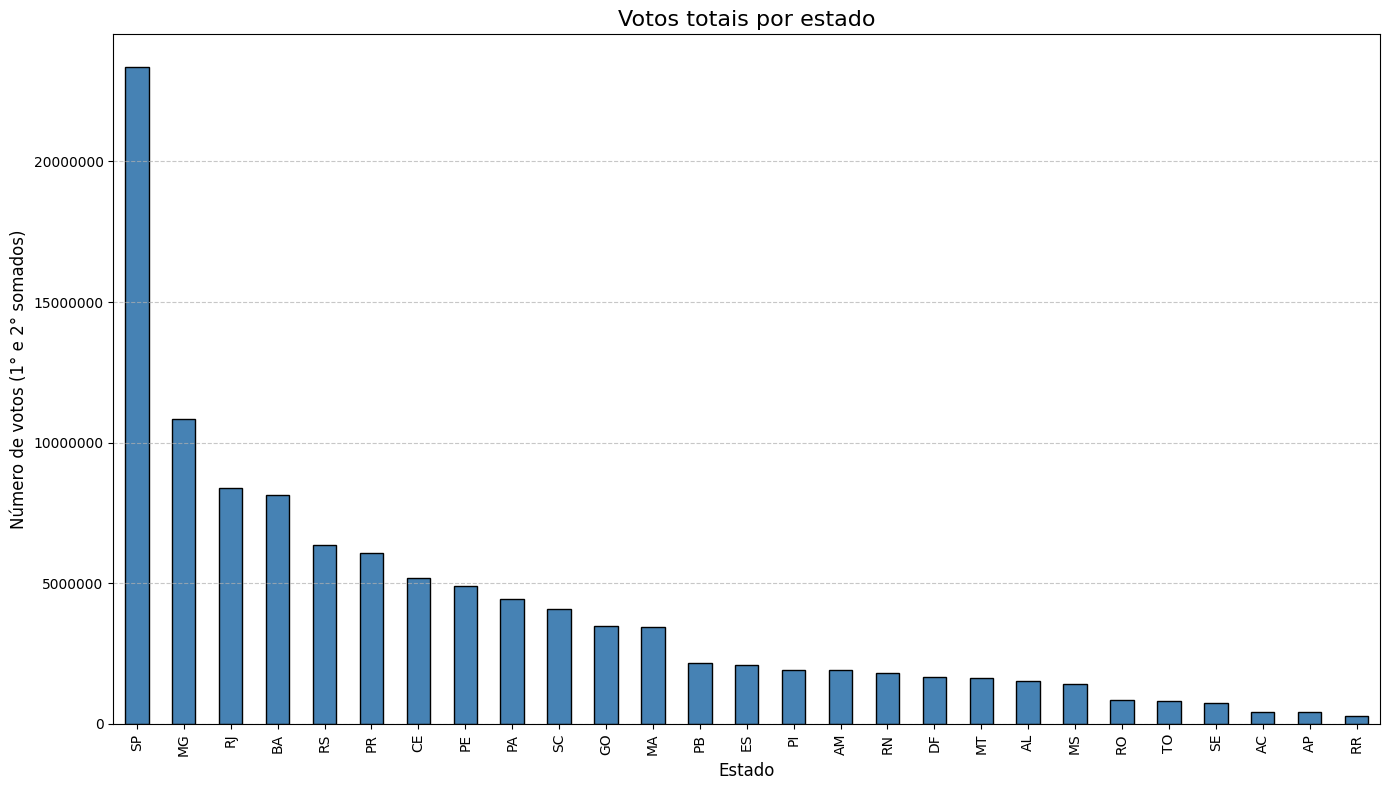

In [16]:
# Plotando votos por estado

votos = df_votacao.groupby(['SG_UF'])['QT_VOTOS_NOMINAIS_VALIDOS'].sum()
votos = votos.sort_values(ascending=False)
plt.figure(figsize=(14, 8))
votos.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Votos totais por estado', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Número de votos (1° e 2° somados)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

---
## Detecção de Outliers

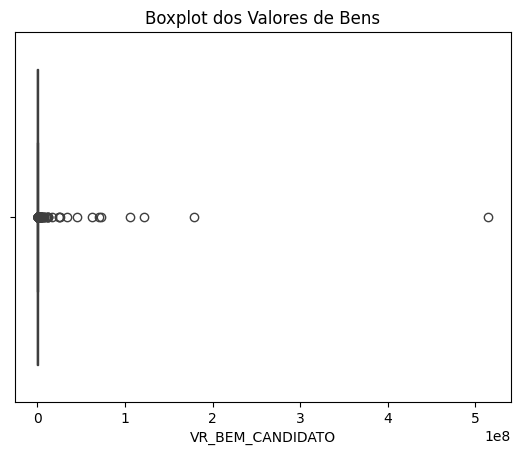

In [17]:
# Visualização de ouliers nos bens declarados 

sns.boxplot(x=df_bens['VR_BEM_CANDIDATO'])
plt.title('Boxplot dos Valores de Bens')
plt.show()

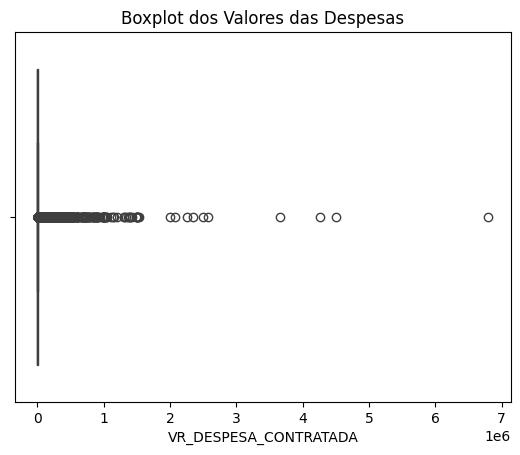

In [18]:
# Verificação de outliers nas despesas

sns.boxplot(x=df_despesas['VR_DESPESA_CONTRATADA'])
plt.title('Boxplot dos Valores das Despesas')
plt.show()

---
## Correlações

In [19]:
# Agrupando os votos por candidato

df_votacao = df_votacao.groupby(['SQ_CANDIDATO', 'NM_CANDIDATO', 'NM_PARTIDO', 'SG_UF'])['QT_VOTOS_NOMINAIS_VALIDOS'].sum().reset_index()
display(df_votacao.head())

,SQ_CANDIDATO,NM_CANDIDATO,NM_PARTIDO,SG_UF,QT_VOTOS_NOMINAIS_VALIDOS
0,10001595336,NILSON EUCLIDES DA SILVA,PARTIDO SOCIALISMO E LIBERDADE,AC,1125
1,10001601556,SERGIO DE OLIVEIRA CUNHA,PARTIDO SOCIAL DEMOCRATICO,AC,27393
2,10001606307,DAVID SOARES HALL,AGIR,AC,771
3,10001612476,GLADSON DE LIMA CAMELI,PROGRESSISTAS,AC,242100
4,10001616169,JORGE NEY VIANA MACEDO NEVES,PARTIDO DOS TRABALHADORES,AC,103265


In [20]:
# Agrupando os bens por candidato

df_bens = df_bens.groupby('SQ_CANDIDATO')['VR_BEM_CANDIDATO'].sum().reset_index()
display(df_bens.head())

,SQ_CANDIDATO,VR_BEM_CANDIDATO
0,10001595336,513900.00
1,10001601556,3744024.59
2,10001606307,12500.00
3,10001612476,5161383.44
4,10001616169,3663896.66


In [21]:
# Agrupando as despesas por candidato

df_despesas = df_despesas.groupby('SQ_CANDIDATO')['VR_DESPESA_CONTRATADA'].sum().reset_index()
display(df_despesas.head())

,SQ_CANDIDATO,VR_DESPESA_CONTRATADA
0,10001595336,213127.50
1,10001601556,3016571.30
2,10001606307,99998.00
3,10001612476,4077998.59
4,10001616169,2462596.06


In [22]:
# Integrando os datasets

df_merged = pd.merge(df_votacao, df_bens, on='SQ_CANDIDATO', how='left')
df_merged = pd.merge(df_merged, df_despesas, on='SQ_CANDIDATO', how='left')

display(df_merged.head())

,SQ_CANDIDATO,NM_CANDIDATO,NM_PARTIDO,SG_UF,QT_VOTOS_NOMINAIS_VALIDOS,VR_BEM_CANDIDATO,VR_DESPESA_CONTRATADA
0,10001595336,NILSON EUCLIDES DA SILVA,PARTIDO SOCIALISMO E LIBERDADE,AC,1125,513900.00,213127.50
1,10001601556,SERGIO DE OLIVEIRA CUNHA,PARTIDO SOCIAL DEMOCRATICO,AC,27393,3744024.59,3016571.30
2,10001606307,DAVID SOARES HALL,AGIR,AC,771,12500.00,99998.00
3,10001612476,GLADSON DE LIMA CAMELI,PROGRESSISTAS,AC,242100,5161383.44,4077998.59
4,10001616169,JORGE NEY VIANA MACEDO NEVES,PARTIDO DOS TRABALHADORES,AC,103265,3663896.66,2462596.06


Correlação entre votos e bens declarados: 0.03969383588596277


<Axes: xlabel='VR_BEM_CANDIDATO', ylabel='QT_VOTOS_NOMINAIS_VALIDOS'>

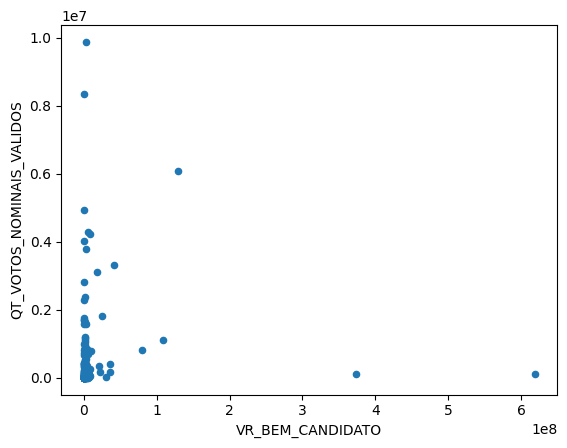

In [23]:
# Calculando a correlação entre votos e bens declarados

correlacao_votos_bens = df_merged['QT_VOTOS_NOMINAIS_VALIDOS'].corr(df_merged['VR_BEM_CANDIDATO'])
print("Correlação entre votos e bens declarados:", correlacao_votos_bens)
df_merged.plot.scatter(x='VR_BEM_CANDIDATO', y='QT_VOTOS_NOMINAIS_VALIDOS')

Correlação entre votos e despesas: 0.8030276137269629


<Axes: xlabel='VR_DESPESA_CONTRATADA', ylabel='QT_VOTOS_NOMINAIS_VALIDOS'>

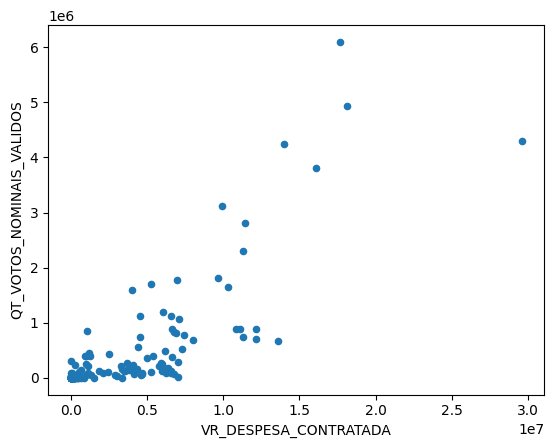

In [24]:
# Calculando a correlação entre votos e despesas

correlacao_votos_despesas = df_merged['QT_VOTOS_NOMINAIS_VALIDOS'].corr(df_merged['VR_DESPESA_CONTRATADA'])
print("Correlação entre votos e despesas:", correlacao_votos_despesas)
df_merged.plot.scatter(x='VR_DESPESA_CONTRATADA', y='QT_VOTOS_NOMINAIS_VALIDOS')

## Salvar Dados Integrados

In [25]:
# Salvando o dataset integrado

df_merged.to_csv('data/cleaned/df_merged.csv', sep=';', index=False, encoding='utf-8')